In [1]:
import matplotlib

import re
import numpy as np

In [2]:
train_acc_regex = "final_train_acc: (\d+.\d+)"
test_acc_regex = "final_test_acc: (\d+.\d+)"

def plot_result_file(filename, parameter, parameter_name, x_logscale=False, basex=10, linewidth=2, grid_linewidth=1, ylabel=False):
    parameter_regex = "{}=(\d+(?:\.\d+)?)".format(parameter)
    params = []
    train_accs = []
    test_accs = []
    with open(filename) as f:
        for line in f:
            param_match = re.search(parameter_regex, line)
            params.append(float(param_match.groups()[0]))
            train_acc_match = re.search(train_acc_regex, line)
            train_accs.append(float(train_acc_match.groups()[0]))
            test_acc_match = re.search(test_acc_regex, line)
            test_accs.append(float(test_acc_match.groups()[0]))
    params, train_accs, test_accs = np.array(params), np.array(train_accs), np.array(test_accs)
    argsort = np.argsort(params)
    params, train_accs, test_accs = params[argsort], train_accs[argsort], test_accs[argsort]
    print(f'{parameter_name} values: {params}')
    plt.figure()
#     plt.title(f'Ablation study on {parameter_name}')
    
    plt.xlabel(parameter_name)
    plt.xticks(params)
    if ylabel:
        plt.ylabel('accuracy (%)')
    plt.ylim(top=100, bottom=65)
    plt.plot(params, train_accs, color='blue', linewidth=linewidth, marker='x', mew=2, ms=10)
    plt.plot(params, test_accs, color='red', linewidth=linewidth,  marker='x', mew=2, ms=10)
    if x_logscale:
        plt.xscale('log', basex=basex)
    plt.grid(linestyle='--', linewidth=grid_linewidth)
    plt.gcf().tight_layout()
    
#     plt.legend()



# Small figures for main paper

In [5]:
font = {'size'   : 24}
matplotlib.rc('font', **font)

import matplotlib.pyplot as plt

number of patches $|\mathcal{D}|$ values: [ 512. 1024. 2048. 4096.]


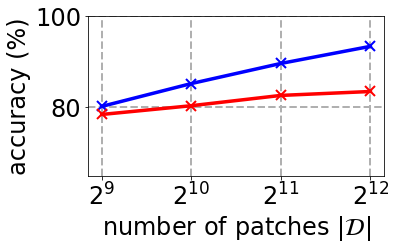

In [6]:
plot_result_file('./ablation_study_npatches.txt', 'n_channel_convolution', 'number of patches $|\mathcal{D}|$', x_logscale=True, basex=2, linewidth=3.5, grid_linewidth=2, ylabel=True)

number of neighbors K values: [  10.   50.  100.  500.  800. 1000. 1500.]


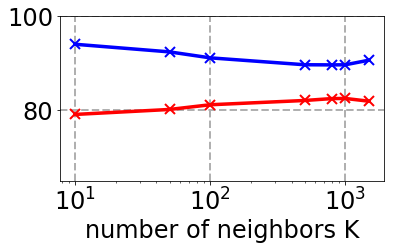

In [7]:
plot_result_file('./ablation_study_K.txt', 'kneighbors', 'number of neighbors K', x_logscale=True, grid_linewidth=2, linewidth=3.5)

patch size Q values: [4. 5. 6. 7. 8.]


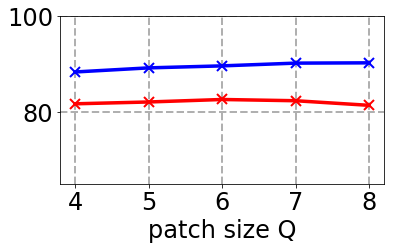

In [8]:
plot_result_file('./ablation_study_Q.txt', 'spatialsize_convolution', 'patch size Q', grid_linewidth=2, linewidth=3.5)

whitening regularization $\lambda$ values: [0.e+00 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


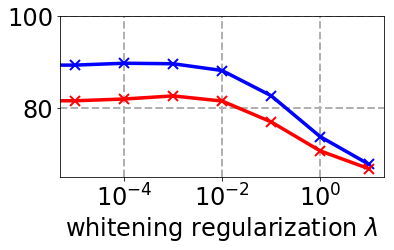

In [9]:
plot_result_file('./ablation_study_eps.txt', 'whitening_reg', r'whitening regularization $\lambda$', x_logscale=True, grid_linewidth=2, linewidth=3.5)

# Large figures for appendix

In [10]:
font = {'size'   : 14}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt

number of patches $|\mathcal{D}|$ values: [ 512. 1024. 2048. 4096.]


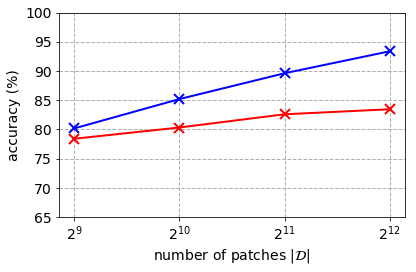

In [11]:
plot_result_file('./ablation_study_npatches.txt', 'n_channel_convolution', 'number of patches $|\mathcal{D}|$', x_logscale=True, basex=2, ylabel=True)

number of neighbors K values: [  10.   50.  100.  500.  800. 1000. 1500.]


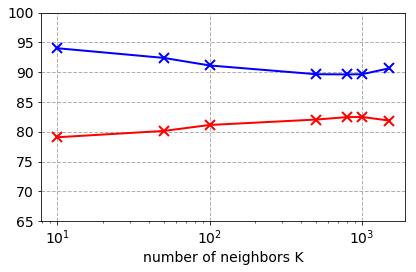

In [12]:
plot_result_file('./ablation_study_K.txt', 'kneighbors', 'number of neighbors K', x_logscale=True)

patch size Q values: [4. 5. 6. 7. 8.]


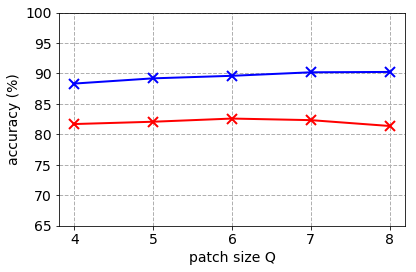

In [13]:
plot_result_file('./ablation_study_Q.txt', 'spatialsize_convolution', 'patch size Q', ylabel=True)

whitening regularization $\lambda$ values: [0.e+00 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


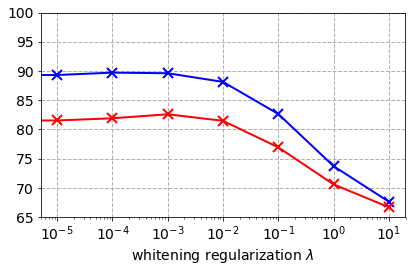

In [14]:
plot_result_file('./ablation_study_eps.txt', 'whitening_reg', r'whitening regularization $\lambda$', x_logscale=True)